In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
cancer_df = pd.read_csv('Breast_cancer_data.csv')
cancer_df

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


In [3]:
cancer_df.diagnosis.value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

In [4]:
cancer_df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [5]:
cancer_df.dtypes

mean_radius        float64
mean_texture       float64
mean_perimeter     float64
mean_area          float64
mean_smoothness    float64
diagnosis            int64
dtype: object

In [6]:
cancer_df.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

<Axes: xlabel='diagnosis', ylabel='mean_radius'>

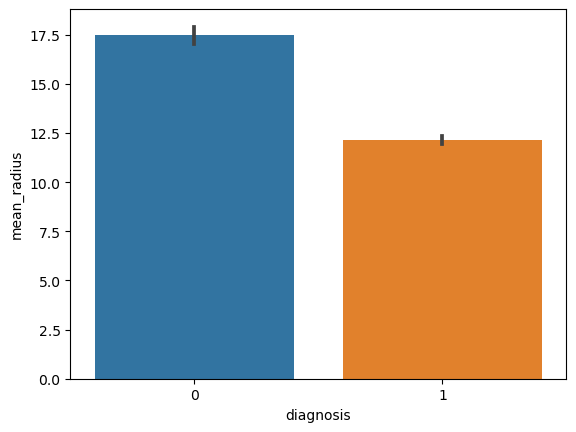

In [7]:
sns.barplot(data=cancer_df, y='mean_radius', x='diagnosis')

<Axes: xlabel='diagnosis', ylabel='mean_texture'>

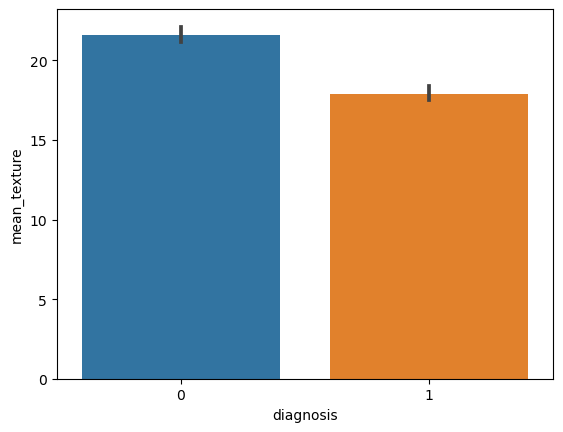

In [8]:
sns.barplot(data=cancer_df, y='mean_texture', x='diagnosis')

<Axes: xlabel='diagnosis', ylabel='mean_perimeter'>

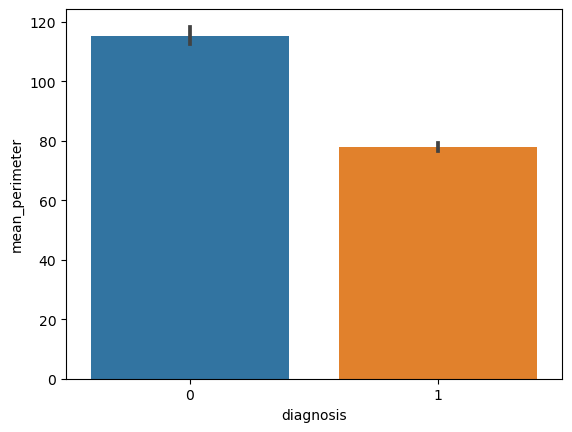

In [9]:
sns.barplot(data=cancer_df, y='mean_perimeter', x='diagnosis')

<Axes: xlabel='diagnosis', ylabel='mean_area'>

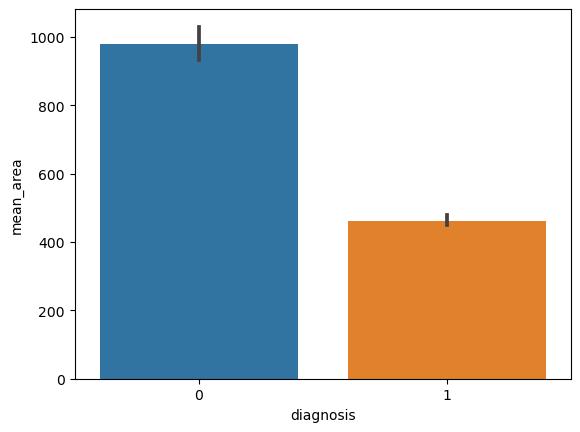

In [10]:
sns.barplot(data=cancer_df, y='mean_area', x='diagnosis')

<Axes: xlabel='diagnosis', ylabel='mean_smoothness'>

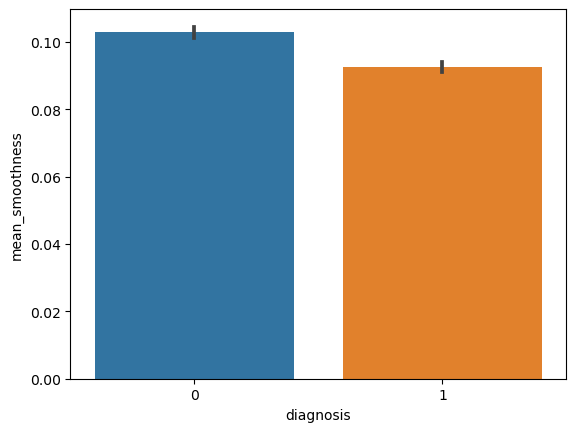

In [11]:
sns.barplot(data=cancer_df, y='mean_smoothness', x='diagnosis')

<Axes: xlabel='mean_radius', ylabel='mean_smoothness'>

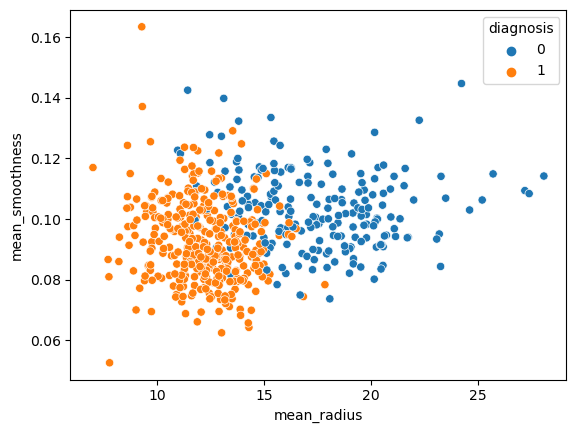

In [12]:
sns.scatterplot(x=cancer_df['mean_radius'], y=cancer_df['mean_smoothness'], hue=cancer_df['diagnosis'])

In [13]:
X = cancer_df[['mean_radius','mean_texture','mean_perimeter','mean_area','mean_smoothness']]
y = cancer_df['diagnosis']
X

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
0,17.99,10.38,122.80,1001.0,0.11840
1,20.57,17.77,132.90,1326.0,0.08474
2,19.69,21.25,130.00,1203.0,0.10960
3,11.42,20.38,77.58,386.1,0.14250
4,20.29,14.34,135.10,1297.0,0.10030
...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100
565,20.13,28.25,131.20,1261.0,0.09780
566,16.60,28.08,108.30,858.1,0.08455
567,20.60,29.33,140.10,1265.0,0.11780


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.33, random_state=42)

In [15]:
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)

LGBMClassifier()

In [16]:
y_pred = clf.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_pred, y_test)
accuracy

0.93717277486911

In [19]:
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y_test, y_pred)
auc_score

0.9347800095648016

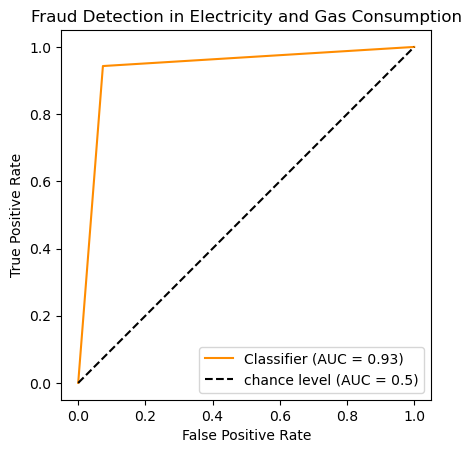

In [20]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(
    y_test.ravel(),
    y_pred.ravel(),
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Fraud Detection in Electricity and Gas Consumption")
plt.legend()
plt.show()